In [1]:
import pandas as pd
import numpy as np


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [5]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [4]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [10]:
bank_data = pd.read_csv(r"C:\Users\Aradhana\OneDrive\Documents\Machine_Learning_Lab\Assignment_7\bank-marketing.csv", sep=";")

In [11]:
print(bank_data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [12]:
bank_data['default'] = bank_data['default'].map({'no':0,'yes':1,'unknown':0})
bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})

In [18]:
X = bank_data.drop('y', axis=1)
y = bank_data['y']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
y_pred = rf.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9106579266812334
Precision: 0.6395511921458625
Recall: 0.48770053475935826


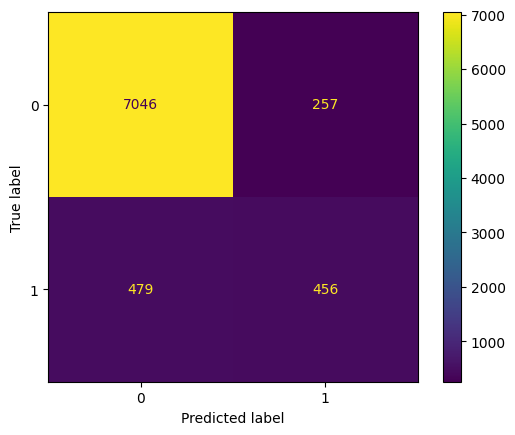

In [29]:
y_pred = rf.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


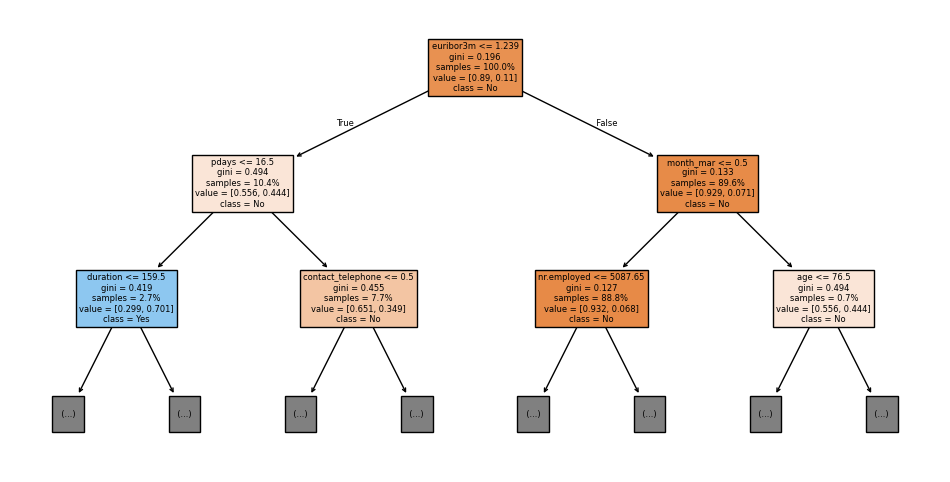

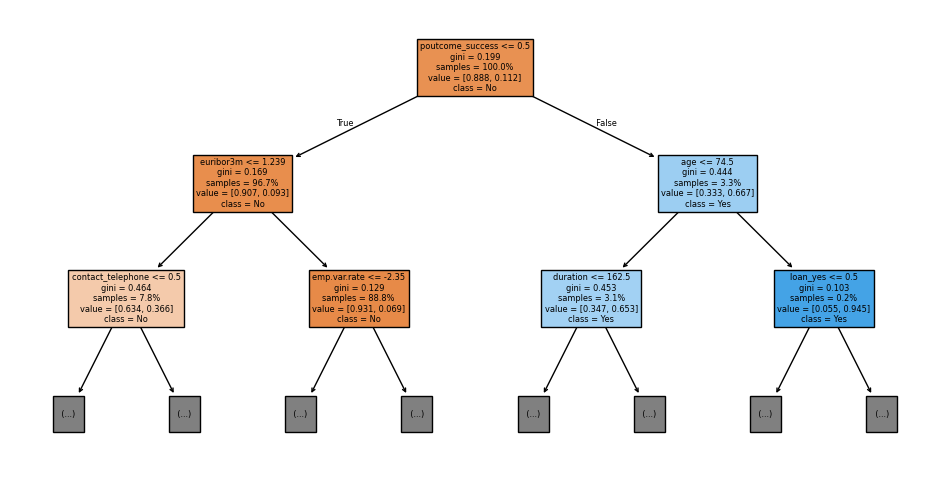

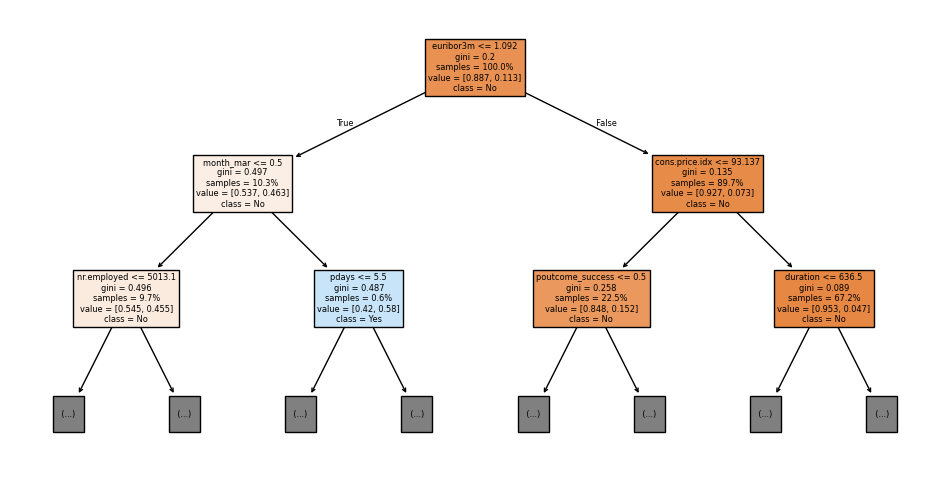

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

for i in range(3):
    plt.figure(figsize=(12,6))
    plot_tree(rf.estimators_[i], 
              feature_names=X_train.columns, 
              class_names=["No","Yes"],
              filled=True, 
              max_depth=2, 
              proportion=True)
    plt.show()
